# Tutorial 2 - Optimisation

The purpose of this tutorial is:

1.   Implementing the optimisation algorithms listed below:
     
        -   Gradient Descent Method
        -   Gradient Descent Method with Momentum
        -   Newton's Method

2.   Comparing the convergence of the implemented algorithms.

3.   Tackling a case study on projectile trajectory

4.   Understanding how the convergence of the algorithms depends on the condition number of the problem.

## Linear Regression
***
### Fundamentals

Let us suppose that we would like to predict the price of a house. Inputs are the age of the building, total area, garage quality, and other information—that we believe affect a house’s worth. The output is the price of the house. _Such problems where the output is a number are regression problems_.

The regression problem where the numeric outcome is predicted through an affine function is called linear regression.

Input: $(X^i,y^i)_{i \in \{1,\dotsc,m\}}$ where 

- $m \in \mathbb{N}$ is the number of samples in the dataset

- $n \in \mathbb{N}$ is the number of features

- $X^i \in \mathbb{R}^n$  is an $n$ dimensional input vector for the $i^{\textit{th}}$ sample

- $y^i \in \mathbb{R}$ is the numeric output value associated with sample $i$


Output: The goal in linear regression is to fit a hyperplane that explains the data most. In other words, we would like to estimate $\beta := (\beta_0, \beta_1, \dotsc, \beta_n)$ (one coefficient for each feature plus a constant) that

- predicts a new sample $y^{m+1}$ with $\displaystyle y^{m+1}=\beta_0 + \sum_{i=1}^n \beta_i X_i^{m+1}$
    
- minimizes the objective function of the form $\displaystyle \frac{1}{2m}\sum_{i=1}^m \bigg(y^i-\Big(\beta_0 + \sum_{i=1}^n \beta_i X_i^{m+1}\Big)\bigg)^2$ **(OLS problem)**



### OLS in Matrix Form

$$\begin{align*}
X=\begin{bmatrix} 
1& x^1_{1} & \dots  & x^1_{n}\\
\vdots & \vdots & \ddots & \vdots\\
1& x^m_{1} & \dots  & x^m_{n} 
\end{bmatrix}_{m\times(n+1)}, \quad y=\begin{bmatrix} y^1 \\ \vdots \\ y^m \end{bmatrix}_{m \times 1}, \quad \beta=\begin{bmatrix} \beta_0, \\ \beta_1 \\ \vdots \\ \beta_{n+1} \end{bmatrix}_{(n+1) \times 1}
\end{align*} $$

Then, OLS in matrix form can be formalized as the following quadratic optimization problem:

$$\begin{align}
\underset{x}{\min} f(x) := \frac{1}{2m}||Ax-b||_2^2 
\end{align}$$

***
## Algorithms

### Fundamentals

Three algorithms that we are going to implement today are so-called iterative algorithms. They generate a sequence of points $\beta^0, \beta^1, \dotsc$ in $\mathbb{R}^n$ in the hope that this sequence will converge to a local minimizer. In our case, it converges to a global minimizer as we have a convex optimization problem. A typical rule for generating such a sequence would be to start with a vector $\beta^0$, and then for $k \geq 0$, move from iteration $k$ to $k+1$ by

\begin{align}
\beta^{k+1} = \beta^k + \alpha_k d_k
\end{align}

in a way that we ensure $f(\beta^{k+1})\leq f(\beta^k)$. The parameter $\alpha_k \in \mathbb{R}$ is called the step length, while $d_k \in \mathbb{R}^n$ is the search direction.

#### Gradient Descent and Newton's Method

There are many ways in which the direction $d_k$ can be chosen. If we have

\begin{align}
d_k = - \nabla f(\beta^k)
\end{align}

then we take a step in the direction of steepest descent and the method is called gradient descent. If there is second-order information available, then we can take steps of the form

\begin{align}
d_k = - \nabla^2 f(\beta^k)^{-1} \nabla f(\beta^k)
\end{align}

The resulting method is called Newton's method. If applicable, Newton's method tends to converge faster to a solution, but the computation at each step is more expensive.

#### Gradient Descent with Momentum

Unlike the first two algorithms, this method carries over some momentum from previous iterations: Instead of only taking into account the current iterations, the gradient step is based on a combination current and previous steps. In this setting, we update $\beta^{k+1}$ by 

\begin{align}
\beta^{k+1} = \beta^k + \alpha_k \theta_k
\end{align}
where

\begin{align}
\theta_k = -\Big(\nabla f(\beta^k)+\eta \theta_{k-1}\Big)
\end{align}


## Let's start coding!
***

In [3]:
# Importing necessary libraries

import torch
import numpy as np

# Libraries for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

# Libraries for downloading a dataset
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

We can now define the functions to be used later in the implementation

In [4]:
def predict(X, betas):
    '''
    Returns the predictions for a given input matrix X and coefficients betas
    using PyTorch tensor operations.

    @params:
    X: 2D PyTorch tensor with dim (n_sample, n_feature+1)
    betas: 1D PyTorch tensor with dim (n_feature+1,)

    @return:
    1D PyTorch tensor with dim (n_sample,)
    '''

    ######## TODO: ########
    # Assume the matrix has already been augmented with a column of ones
    #return torch.matmul(X,betas)
    #return X.mv(betas)
    return X @ betas


def OLS_objective_value(X, y, betas):
    '''
    Returns the objective function value for a given input matrix X, 
    an output vector y, and coefficients betas using PyTorch tensor operations.

    @params:
    X: 2D PyTorch tensor with dim (n_sample, n_feature+1)
    y: 1D PyTorch tensor with dim (n_sample,)
    coeffs: 1D PyTorch tensor with dim (n_feature+1,)

    @return:
    Singleton tensor
    '''
    m = y.shape[0]             # Number of samples
    y_hat = predict(X, betas)  # Predictions

    ######## TODO: ########
    val = 1/(2*m) * torch.sum((y - y_hat)**2)  # OLS objective function
    #print(val)
    return val

In [5]:
# Testing the model
# torch.mv() is matrix-vector multiplication

# Creating testing data
X_testing = torch.randn(100,2)
betas_testing = torch.ones(2)
y_testing = 2 * X_testing.mv(betas_testing) + torch.randn(100)*0.01

# Testing the predict function
predictions_testing = predict(X_testing, betas_testing)

# Check that the shape of the output of predict function is correct 
if len(predictions_testing.shape) != 1:
  raise RuntimeError('predict function does ot return 1d tensor')

# Testing the OLS_objective_value function
OLS_obj_value_testing = OLS_objective_value(X_testing, y_testing, betas_testing)

# Check that the output of OLS_objective_value function is a singleton tensor
if len(OLS_obj_value_testing.shape) != 1 and OLS_obj_value_testing.numel() !=1:
  raise RuntimeError('OLS_objective_value function does ot return singleton tensor')

# print(predictions_test)
# print(OLS_obj_value_test)

print('Great, it should work')

Great, it should work


We then create a class called `Optimizer` from which the classes designed for each algorithm are inherited.

In [6]:
class Optimizer:
    
    '''
    It is the class from which classes associated with each algorithm
    is inherited. This includes the common attributes and methods
    shared by all algorithms. 
    '''

    def __init__(self, X, y, learning_rate, init_betas=None, tolerance=1e-6):
        '''
        Initializes the Optimizer.

        Parameters
        ----------
        X : 2D torch Tensor
            Input data with dimensions (n_samples, n_features).
        y : 1D torch Tensor
            Output/target data with dimension (n_samples,).
        learning_rate : float
            Learning rate or regularization parameter.
        init_betas : 1D torch Tensor, optional
            Initial coefficients for the model with dimension (n_features + 1,).
            Defaults to a zero tensor if not provided.
        tolerence : float, optional
            Tolerance for convergence criteria.
        '''

        # Storing initial data
        self.X_original = X
        self.y = y

        # Extracting dimensions
        self.n_sample, self.n_feature = X.shape

        ######## TODO: ########
        # Adding a column of ones for the intercept term

        self.X = torch.cat([torch.ones(self.n_sample,1),X], axis = 1)
        ######## TODO: ########
        # Storing hyperparameters
        self.lr = learning_rate
        self.ToL = tolerance

        # Initialize coefficients
        if init_betas is not None:
            self.betas = init_betas
        else:
            self.betas = torch.zeros((self.n_feature + 1))

        # Algorithm history
        self.obj_history = [OLS_objective_value(self.X, self.y, self.betas)]


    # ---------------------------------------------------------------------------------
    # UTILS FUNCTIONS FOR PLOTTING DO NOT CHANGE - unless you know what you are doing
    # ---------------------------------------------------------------------------------
    def plot_learned_model(self, algorithm_name):
        
        '''
        Visualizes the learned model so that 
        if n=1, it shows the fitted line
        if n=2, it shows the fitted hyperplane
        otherwise, it gives us an error.
        '''
        
        if self.n_feature > 2:
            raise ValueError('You can visualize only in 2D and 3D!')

        if self.n_feature == 1:
            y_hat = predict(self.X, self.betas).numpy()
            fig, ax = plt.subplots(figsize=(8, 4))
            ax.plot(self.X_original.numpy(), y_hat, color='k', label='Learned Model')
            ax.scatter(self.X_original.numpy(), self.y.numpy(), edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
            ax.set_ylabel('Predicted Value', fontsize=13)
            ax.set_xlabel('Feature Value', fontsize=13)
            ax.legend(facecolor='white', fontsize=11)
            ax.set_title(f'Learned Model with {algorithm_name}', fontsize=15)
            fig.tight_layout()

        elif self.n_feature == 2:
            x1 = self.X_original[:, 0].numpy()
            x2 = self.X_original[:, 1].numpy()
            y_np = self.y.numpy().reshape((self.n_sample,))

            x1_range = np.linspace(np.min(x1), np.max(x1), 30)
            x2_range = np.linspace(np.min(x2), np.max(x2), 30)
            xx_pred, yy_pred = np.meshgrid(x1_range, x2_range)
            model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
            model_viz_b = np.c_[np.ones((model_viz.shape[0],1)), model_viz]

            response = predict(torch.from_numpy(model_viz_b).float(), self.betas).numpy()

            plt.style.use('default')
            fig = plt.figure(figsize=(12, 4))

            ax1 = fig.add_subplot(131, projection='3d')
            ax2 = fig.add_subplot(132, projection='3d')
            ax3 = fig.add_subplot(133, projection='3d')

            axes = [ax1, ax2, ax3]

            for ax in axes:
                ax.plot(x1, x2, y_np, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
                ax.scatter(xx_pred.flatten(), yy_pred.flatten(), response, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
                ax.set_xlabel('Feature 1', fontsize=12)
                ax.set_ylabel('Feature 2', fontsize=12)
                ax.set_zlabel('Prediction', fontsize=12)
                ax.locator_params(nbins=4, axis='x')
                ax.locator_params(nbins=5, axis='x')

            ax1.view_init(elev=28, azim=120)
            ax2.view_init(elev=4, azim=114)
            ax3.view_init(elev=60, azim=165)

            fig.suptitle(f'Learned Model with {algorithm_name}', fontsize=15)
            fig.tight_layout()

    def plot_loss(self):

        if len(self.obj_history) == 1:
            raise ValueError('No history to plot.')

        fig, ax = plt.subplots(figsize=(8, 4))
        ax.plot(self.obj_history, color='k')
        ax.set_ylabel('Objective Function Value')
        ax.set_xlabel('Iteration')
        ax.grid()
        ax.set_title(f'Convergence of {self.algorithm_name}')
        fig.tight_layout()
        plt.show()

In [7]:
# Testing the Optimizer class

opt_testing = Optimizer(X_testing, y_testing, 0.01)

if type(opt_testing.X) != torch.Tensor:
  raise RuntimeError('X should be a tensor')

if type(opt_testing.lr) != float:
  raise RuntimeError('learning_rate should be a float')

if opt_testing.X.shape != torch.Size([100,3]):
  raise RuntimeError('X should have 100 rows and 3 columns')

if not torch.equal(opt_testing.X[:, 0], torch.ones(100)):
  raise RuntimeError('X should have a column of ones')

print('Great, it should work')

Great, it should work


We can now introduce the classes one by one for each algorithm.

### Standard Gradient Descent (no autograd)
***

In [12]:
class GradientDescent(Optimizer):

    def __init__(self, X, y, learning_rate, init_betas=None, tolerance=1e-6):
        '''
        Constructor for the Gradient Descent optimizer.

        Parameters
        ----------
        X : 2D PyTorch tensor
            Input data with dimensions (n_samples, n_features).
        y : 1D PyTorch tensor
            Target/output data with dimension (n_samples,).
        learning_rate : float
            Learning rate for the optimization algorithm.
        '''

        super().__init__(X, y, learning_rate, init_betas=init_betas, tolerance=tolerance)
        self.algorithm_name = 'Gradient Descent'

    def run(self, max_iter=10000):
        '''
        Runs the Gradient Descent optimization algorithm.

        Parameters
        ----------
        max_iter : int, optional
            Maximum number of iterations for the optimization process.
        '''
        n_iter = 0
        while n_iter < max_iter:

            ######## TODO: ########
            # Gradient computation
            y_hat = predict(self.X,self.betas)
            #derivative in vector form
            gradient = (1/self.n_sample)*self.X.T.mv(y_hat-self.y) # use torch.mv = matrix-vector product

            # Update parameters
            x_old = self.betas.clone()
            self.betas -= self.lr * gradient

            # History update
            self.obj_history.append(OLS_objective_value(self.X, self.y, self.betas).item())

            n_iter += 1

            # Convergence check
            if torch.sum(torch.abs(self.betas - x_old)) <= self.ToL:
                print(f'{self.algorithm_name} has converged in {n_iter} iterations')
                break

        if n_iter == max_iter:
            print(f'{self.algorithm_name} has reached the maximum number of iterations ({max_iter})')

    def plot_learned_model(self):
        # Inherited from 'Optimizer' class with the algorithm name
        super().plot_learned_model(self.algorithm_name)


Gradient Descent has converged in 135 iterations


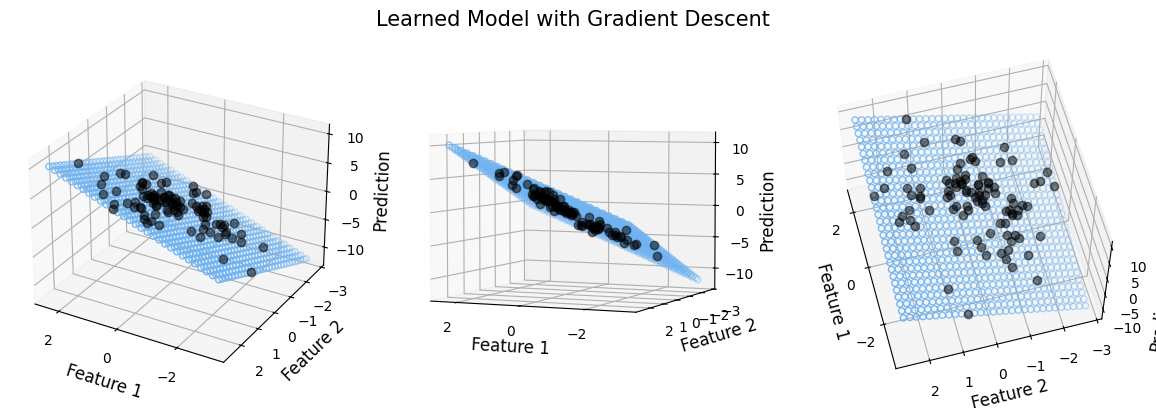

In [13]:
# Testing on toy data
gd_testing = GradientDescent(X_testing, y_testing, learning_rate=0.1)
gd_testing.run()
gd_testing.plot_learned_model()

### Introducing momentum to gradient descent (no autograd)
***

In [18]:
class GradientDescentMomentum(Optimizer):
    
    def __init__(self, X, y, learning_rate, eta, init_betas=None, tolerance=1e-6):
        '''
        Constructor for the Gradient Descent with Momentum optimizer.

        Parameters
        ----------
        X : 2D PyTorch tensor
            Input data with dimensions (n_samples, n_features).
        y : 1D PyTorch tensor
            Target/output data with dimension (n_samples,).
        learning_rate : float
            Learning rate for the optimization algorithm.
        eta : float
            Momentum factor, indicating the importance of the previous iteration's parameter update.
        '''
        
        super().__init__(X, y, learning_rate, init_betas=init_betas, tolerance=tolerance)
        self.eta = eta
        self.algorithm_name = 'Gradient Descent Momentum'

    def run(self, max_iter=20000):

        # Initialize number of iterations
        n_iter = 0

        # Initialize momentum
        theta = torch.zeros((self.n_feature + 1))

        while n_iter < max_iter:

            # Storing the values of betas for tolerance check. 
            betas_old = self.betas.clone()

            ######## TODO: ########
            # Gradient computation
            y_hat = predict(self.X,self.betas)
            theta_old = theta.clone()

            ######## TODO: ########
            theta = self.eta * theta_old + (1/self.n_sample)*self.X.T.mv(y_hat-self.y)
            self.betas -= self.lr * theta    

            # Here initialising theta_old wasn't necessary but it is good practice beacuse if we were using autograd
            # it would have given the error 'inplace operation on a tensor that is being grad tracked'

            # Convergence check and n_iter and history update
            self.obj_history.append(OLS_objective_value(self.X, self.y, self.betas).item())
            n_iter += 1

            if torch.sum(torch.abs(self.betas - betas_old)) <= self.ToL:
                print(f'{self.algorithm_name} has converged in {n_iter} iterations')
                break

        if n_iter == max_iter:
            print(f'{self.algorithm_name} has reached the maximum number of iterations ({max_iter})')

    def plot_learned_model(self):
        super().plot_learned_model(self.algorithm_name)


Gradient Descent Momentum has converged in 238 iterations


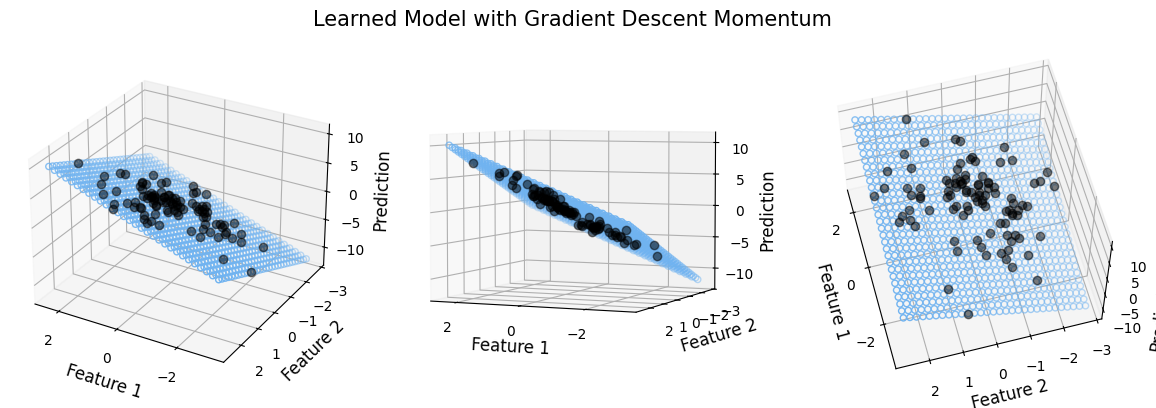

In [19]:
# Testing on toy data
gd_momentum_testing = GradientDescentMomentum(X_testing, y_testing, learning_rate=0.1, eta=0.9)
gd_momentum_testing.run()
gd_momentum_testing.plot_learned_model()

### Convergence comparison
***

#### California housing dataset

In [20]:
# ------------------------------------------------
# DATASET DOWNLOAD DO NOT CHANGE
# ------------------------------------------------

# Load and preprocess the dataset
california = fetch_california_housing()
X, y = california.data[:10000], california.target[:10000]
y = y.squeeze()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

Gradient Descent has reached the maximum number of iterations (20000)
Gradient Descent Momentum has converged in 7876 iterations


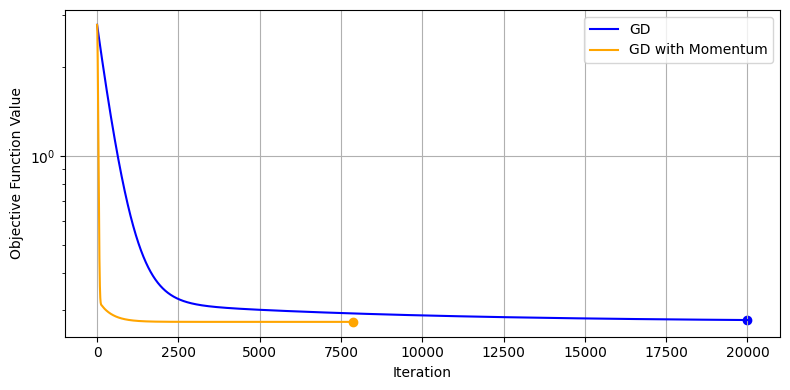

In [21]:
# Running the algorithms

gd_std = GradientDescent(X_tensor, y_tensor, learning_rate=0.001)
gd_std.run(max_iter = 20000)
gd_mom = GradientDescentMomentum(X_tensor, y_tensor, learning_rate=0.001, eta=0.95)
gd_mom.run(max_iter = 10000)

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(gd_std.obj_history, label='GD', color='blue')
plt.plot(gd_mom.obj_history, label='GD with Momentum', color='orange')
plt.scatter(len(gd_std.obj_history) - 1, gd_std.obj_history[-1], marker='o', color='blue')
plt.scatter(len(gd_mom.obj_history) - 1, gd_mom.obj_history[-1], marker='o', color='orange')
plt.yscale('log')
plt.ylabel('Objective Function Value')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()



In [22]:
# ------------------------------------------------
# INTERACTIVE PLOT - DO NOT CHANGE THE CODE BELOW
# ------------------------------------------------
def run_gd_and_plot(learning_rate, eta_mom):
    # Running standard GD
    gd_std = GradientDescent(X_tensor, y_tensor, learning_rate=learning_rate)
    gd_std.run(max_iter=20000)

    # Running GD with Momentum
    gd_mom = GradientDescentMomentum(X_tensor, y_tensor, learning_rate=learning_rate, eta=eta_mom)
    gd_mom.run(max_iter=20000)

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(gd_std.obj_history, label='GD', color='blue')
    plt.plot(gd_mom.obj_history, label='GD with Momentum', color='orange')
    plt.yscale('log')
    plt.ylabel('Objective Function Value')
    plt.xlabel('Iteration')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

# Creating interactive widgets
lr_list = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 0.5, 1]

learning_rate_slider = widgets.SelectionSlider(options=lr_list, description='LR:')
eta_mom_slider = widgets.FloatSlider(value=0.95, min=0, max=1, step=0.05, description='Momentum:')

# Displaying the interactive plot
widgets.interactive(run_gd_and_plot, learning_rate=learning_rate_slider, eta_mom=eta_mom_slider)


interactive(children=(SelectionSlider(description='LR:', options=(0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.…

In the cell above, you can try changing the leanring rate and the momentum

### Newton's method
***


Before writing the class implementing the Newton's method, we need to understand the following proposition.

**Preposition 2:**  In use of the OLS problem, Newton's method converges in a single step independent of the initial point $\beta^0$ when the step size is set to $1$.

**Proof:** We already know from Proposition 1 that
$$
\begin{align*}
\nabla f(\beta) &= \frac{1}{m}[X^T X \beta - X^T y]\\
\nabla^2 f(\beta) &= \frac{1}{m} X^T X
\end{align*}
$$

By inserting those gradient and Hessian computations into the update method of Newton's method, we get

$$
\begin{align*}
\beta^{k+1} &= \beta^k - m (X^T X)^{-1}\frac{1}{m}(X^T X \beta^k - X^Ty)\\
        &= (X^T X)^{-1} X^T y
\end{align*}
$$

This is the standard, closed form expression for the OLS coefficients. Therefore, no matter what we choose for the initial guess $\beta^0$, we'll have the correct solution at $\beta^1$ after a single iteration.

Furthermore, this is a stationary point. Notice that the expression for $\beta^{t+1}$ doesn't depend on $\beta^t$, so the solution won't change if we continue beyond one iteration. This indicates that Newton's method converges in a single step.


In [25]:
class Newton(Optimizer):

    def __init__(self, X, y, learning_rate, init_betas=None, tolerance=1e-6):
        '''
        Constructor for the Gradient Descent optimizer.

        Parameters
        ----------
        X : 2D PyTorch tensor
            Input data with dimensions (n_samples, n_features).
        y : 1D PyTorch tensor
            Target/output data with dimension (n_samples,).
        learning_rate : float
            Learning rate for the optimization algorithm.
        '''

        super().__init__(X, y, learning_rate, init_betas=init_betas, tolerance=tolerance)
        self.algorithm_name = 'Newton method'

    def run(self):
        
        ######## TODO: ########
        self.betas = torch.inverse(self.X.T @ self.X) @ (self.X.T @ self.y)

        # History update
        self.obj_history.append(OLS_objective_value(self.X, self.y, self.betas).item())   

In [26]:
# Run Newton's method
newton = Newton(X_tensor, y_tensor, learning_rate=1)
newton.run()

print('Gradinet Descent Final Objective Value: ', ' '*8, round(gd_std.obj_history[-1], 9))
print('Gradinet Descent Momentum Final Objective Value: ', round(gd_mom.obj_history[-1], 9))
print('Newton Method Final Objective Value: ', ' '*11, round(newton.obj_history[-1], 9))



Gradinet Descent Final Objective Value:           0.277445257
Gradinet Descent Momentum Final Objective Value:  0.273503065
Newton Method Final Objective Value:              0.273503035


### Case Study
***

In this case study, we explore the optimization of a projectile's launch parameters to hit a specific target. We consider the effects of gravity and air resistance and use gradient descent with momentum to find the optimal launch velocity and angle.

#### Physical Model

The motion of the projectile is influenced by gravity and air resistance. The position of the projectile at time \( t \) is given by:

$$
x(t) = (v_0 \cos(\theta) - k v_0^2) \cdot t
$$

$$
y(t) = (v_0 \sin(\theta) - k v_0^2) \cdot t - \frac{1}{2} g t^2
$$

where:
- $ v_0 $ is the initial velocity.
- $ \theta $ is the launch angle.
- $ g $ is the acceleration due to gravity (approximated as 9.81 m/s\(^2\)).
- $ k $ is the air resistance coefficient.
- $ x(t) $ and $ y(t) $ are the horizontal and vertical positions of the projectile at time \( t \), respectively.

#### Loss Function

The loss function is defined as the squared distance between the projectile's landing point and the target:

$$
\text{Loss} = \sqrt{\left( x(t_{\text{land}}) - x_{\text{target}} \right)^2 + \left( y(t_{\text{land}}) - y_{\text{target}} \right)^2}
$$

where $ t_{\text{land}} $ is the time when the projectile lands (i.e., when $ y(t) = 0 $).

#### Optimization with Gradient Descent and Momentum

We use gradient descent with momentum to optimize the initial velocity $ v_0 $ and launch angle $ \theta $. Recall that the update rules are:

$$
v_{\text{new}} = v - \alpha \Big(\nabla_{v} \text{Loss} + \eta \cdot \Delta v_{\text{prev}}\Big)
$$

$$
\theta_{\text{new}} = \theta - \alpha\Big(\nabla_{\theta} \text{Loss} + \eta \cdot \Delta \theta_{\text{prev}}\Big)
$$

where:
- $ \alpha $ is the learning rate.
- $ \eta $ is the momentum factor.
- $ \Delta v_{\text{prev}} $ and $ \Delta \theta_{\text{prev}} $ are the updates from the previous iteration.


In [31]:
def projectile_motion(velocity, angle, time, air_resistance_coefficient=0.005):
    
    g = 9.81  # Gravity
    
    ######## TODO: ########
    # Break down the velocity into its x and y components
    vx = velocity * torch.cos(angle)
    vy = velocity * torch.sin(angle)

    # Air resistance
    air_resistance = air_resistance_coefficient * velocity**2

    ######## TODO: ########
    # Calculate position at time t with air resistance
    x = (vx - air_resistance) * time
    y = (vy - air_resistance) * time -0.5 * g * time**2

    return x, y

def trajectory_loss(velocity, angle, target_x, target_y):
    
    # v = u + at, we want final velocity = -initial velocity
    #so -2u = at, but g is in opposite direction, and we are working in vertical direction
    time_to_land = 2 * velocity * torch.sin(angle) / 9.81
    #find the final x and y
    x, y = projectile_motion(velocity, angle, time_to_land, air_resistance_coefficient=0.005)

    ######## TODO: ########
    return torch.sqrt((x - target_x)**2 + (y - target_y)**2)

In [32]:
# Example usage
velocity = torch.tensor(10.0, requires_grad=True)
angle = torch.tensor(torch.pi / 8, requires_grad=True)

projectile_motion_testing = projectile_motion(velocity, angle, time=torch.tensor(1.0))

if round(projectile_motion_testing[0].item(),4) != 8.7388 and round(projectile_motion_testing[1].item(),4) != -1.5782:
    raise RuntimeError('projectile_motion function does not return correct values')

trajectory_loss_testing = trajectory_loss(velocity, angle, target_x=torch.tensor(8.0), target_y=torch.tensor(0.0))

if round(trajectory_loss_testing.item(), 4) != 1.2448:
    raise RuntimeError('trajectory_loss function does not return correct values')

print('Great, it should work')

Great, it should work


In [39]:
class GradientDescentMomentum2:
    
    def __init__(self, 
                 velocity : float, 
                 angle    : float, 
                 target_x : float, 
                 target_y : float, 
                 eta      : float,
                 learning_rate : float):
        
        ######## TODO: ########
        # Initialising tensors that require grads
        self.velocity = torch.tensor(velocity, requires_grad = True)
        self.angle    = torch.tensor(angle, requires_grad = True)

        ######## TODO: ########
        # Initialising other parameters as floats
        self.target_x = target_x
        self.target_y = target_y
        self.learning_rate = learning_rate
        self.eta = eta

        # Initialising velocity and angle updates
        self.velocity_update = torch.zeros_like(self.velocity)
        self.angle_update = torch.zeros_like(self.angle)

        # For plotting
        self.velocity_history = []
        self.angle_history = []
        self.loss_history = []       


    def run(self, max_iter=10000, tolerance=1e-6):
        
        # Initialising number of iterations
        n_iter = 0

        while n_iter < max_iter:
            
            # Store old parameter values for convergence check
            velocity_old = self.velocity.clone()
            angle_old = self.angle.clone()

            ######## TODO: ########
            # Compute loss and perform backward pass
            loss = trajectory_loss(self.velocity, self.angle, self.target_x, self.target_y)
            loss.backward()

            
            with torch.no_grad():

                ######## TODO: ########
                # Update velocity and angle updates
                self.velocity_update = self.velocity.grad + self.eta * self.velocity_update
                self.angle_update = self.angle.grad + self.eta * self.angle_update

                ######## TODO: ########
                # Update parameters with the learning rate
                self.velocity -= self.learning_rate * self.velocity_update
                self.angle -= self.learning_rate* self.angle_update

                # Apply constraints
                self.angle.clamp_(0, torch.pi / 2)
                self.velocity.clamp_(min=0)

                # Reset gradients
                self.velocity.grad.zero_()
                self.angle.grad.zero_()

                # History update
                self.velocity_history.append(self.velocity.item())
                self.angle_history.append(self.angle.item())
                self.loss_history.append(loss.item())

            # Convergence check
            if torch.abs(self.velocity - velocity_old) <= tolerance and torch.abs(self.angle - angle_old) <= tolerance:
                print(f'Converged in {n_iter} iterations')
                break

            n_iter += 1

        if n_iter == max_iter:
            print(f'Reached the maximum number of iterations ({max_iter})')

    # ------------------------------------------------
    # UTILS FUNCTIONS FOR PLOTTING DO NOT CHANGE 
    # ------------------------------------------------

    def plot_trajectory(self):
        # Plotting the trajectory in parameter space
        plt.figure(figsize=(12, 6))

        # Trajectory in velocity-angle space
        plt.subplot(1, 2, 1)
        plt.plot(self.velocity_history, self.angle_history, marker='o', color='blue')
        plt.xlabel('Velocity')
        plt.ylabel('Angle')
        plt.grid()
        plt.title('Trajectory in Parameter Space')

        # Trajectory in loss space
        plt.subplot(1, 2, 2)
        plt.plot(self.loss_history, marker='o', color='blue')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.grid()
        plt.title('Loss During Optimization')

        plt.tight_layout()
        plt.show()

    # Optional: Implement a function to plot the 3D loss surface and trajectory
    def plot_loss_surface(self, velocity_range, angle_range, trajectory_loss_fn):
        velocity_grid, angle_grid = torch.meshgrid(velocity_range, angle_range)
        loss_surface = torch.zeros_like(velocity_grid)

        for i in range(velocity_grid.size(0)):
            for j in range(velocity_grid.size(1)):
                loss_surface[i, j] = trajectory_loss_fn(velocity_grid[i, j], angle_grid[i, j], self.target_x, self.target_y)

        # Plotting
                
        plt.style.use('default')
        fig = plt.figure(figsize=(18, 8))

        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')

        axes = [ax1, ax2]

        for ax in axes:
            #ax = fig.add_subplot(111, projection='3d')
            ax.plot_surface(velocity_grid.numpy(), angle_grid.numpy(), loss_surface.numpy(), alpha=0.3, cmap='viridis')
            ax.plot(self.velocity_history, self.angle_history, self.loss_history, color='r', marker='o', markersize=3)
            ax.set_xlabel('Velocity')
            ax.set_ylabel('Angle')
            ax.set_zlabel('Loss')
            ax.set_title('Optimization Path in Loss Landscape')

        ax2.view_init(elev=20, azim=80)

        plt.show()

Converged in 9781 iterations


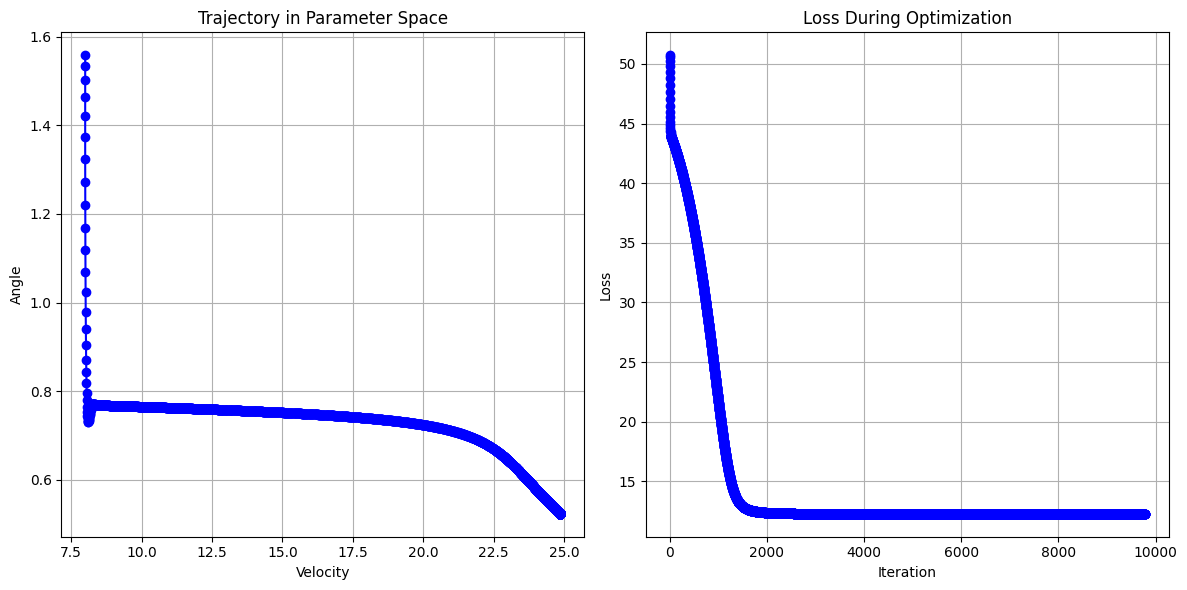

d:\University-local\Imperial\Term 2\Mathematical Foundations of Machine Learning\venv\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


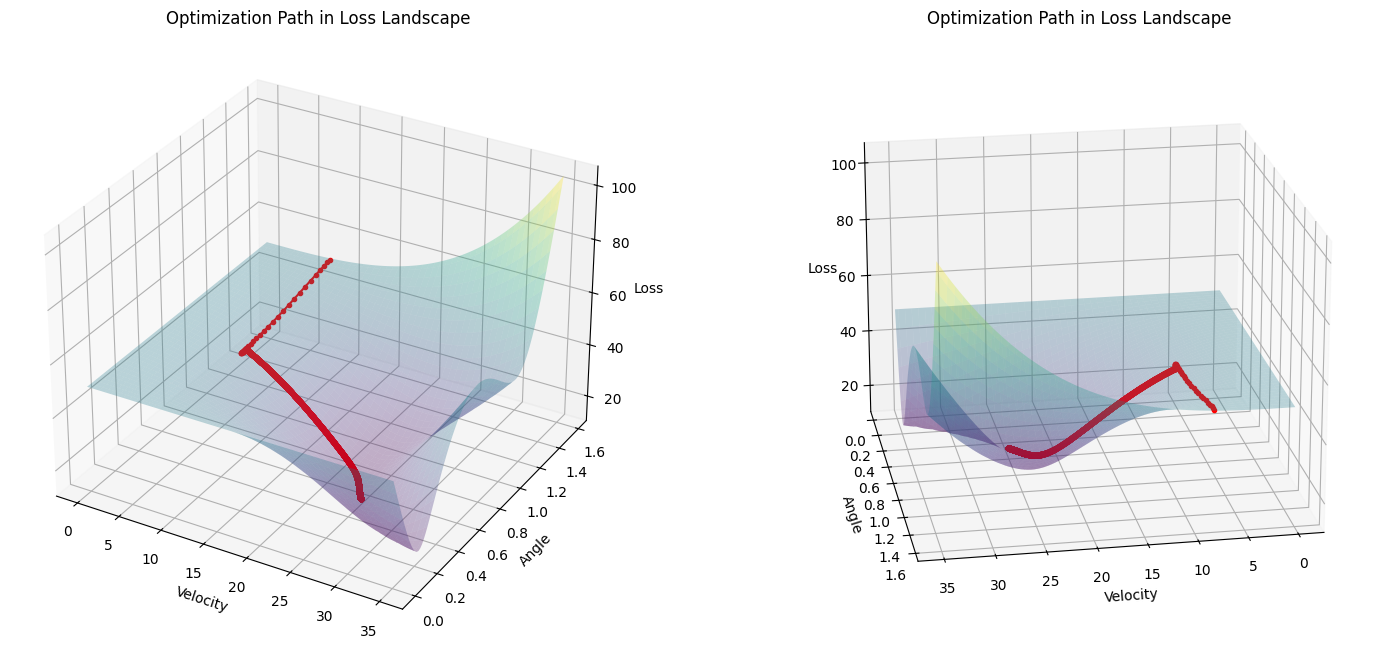

In [40]:
# RUN THIS CELL WITH THIS PARAMS THAT DEFINITELY WORK - then try to change them and see what happens
# (if you change them too much make sure to change the ranges in the plot_loss_surface function - last line of this cell)

# Initial parameters
init_velocity = 8.0
init_angle    = torch.pi / 2  # 45 degrees
target_x      = 50.0
target_y      = 4.0
learning_rate = 0.001
eta           = 0.8

optimizer = GradientDescentMomentum2(velocity=init_velocity, angle=init_angle, target_x=target_x, 
                                    target_y=target_y, learning_rate=learning_rate, eta=eta)

optimizer.run()
optimizer.plot_trajectory()
optimizer.plot_loss_surface(torch.linspace(0, 35, 100), torch.linspace(0, np.pi / 2, 100), trajectory_loss)


### Condition number of a matrix and a useful remark
***


**Remark:** in Newton's method we have to perform the operation $(X^TX)^{-1}X^Ty$. As a result of the associative roperty of matrices we can perform this operation in two different ways:
1. $[(X^TX)^{-1}X^T]y$ (what the code would do without the parethesis)
2. $(X^TX)^{-1}[X^Ty]$

In the second case $[X^Ty]$ leads to a vecor so that we have 1 matrix multiplication (and inversion) and 2 matrix-vector operations; whereas in the first case we have 2 matrix multiplication (and inversion) and 1 matrix-vector operations. Clearly one method is much faster than the other. Let's see!

In [41]:
# Generating random matrix and vector
a=torch.randn(10000, 10000)
b = torch.randn(10000)

import time

# Testing time for matrix-vector multiplication
start = time.time()
res1 = (a.mm(a).mm(a)).mv(b)
end = time.time()
print('2 Matrix Multiplications, 1 Matrix-Vector Multiplication: ', round(end - start, 5))
start = time.time()
res2 = (a.mm(a)).mv(a.mv(b))
end = time.time()
print('1 Matrix Multiplication, 2 Matrix-Vector Multiplications: ', round(end - start, 5))

2 Matrix Multiplications, 1 Matrix-Vector Multiplication:  25.98937
1 Matrix Multiplication, 2 Matrix-Vector Multiplications:  12.40288


#### Condition number of a matrix and impact on gradient descent algos

A condition number for a matrix A, denoted by $\kappa(A)$, measures how sensitive the answer is to perturbations in the input data and to roundoff errors made during the solution process. It is computed by

\begin{align}
\kappa(A) = \sigma^{largest}/ \sigma^{smallest}
\end{align}

where $\sigma^{largest}$ and $\sigma^{smallest}$ represent the largest and smallest singular values, respectively.

In [42]:
def generate_matrix(n_row, n_column, condition_number):
    """
    Generates a matrix in dimension (n_row, n_column) with
    a desired condition number.

    @params:
    --------
    n_row: int
    n_column: int
    condition_number: float

    @return:
    --------
    2D PyTorch tensor
    """
    # Create diagonal matrix of singular values
    singular_values = torch.linspace(1, condition_number, min(n_row, n_column))
    S = torch.zeros((n_row, n_column))
    S[range(min(n_row, n_column)), range(min(n_row, n_column))] = singular_values

    # Create orthogonal matrices U and V using QR decomposition
    U, _ = torch.linalg.qr(torch.randn(n_row, n_row))
    V, _ = torch.linalg.qr(torch.randn(n_column, n_column))

    # Construct the matrix A = U S V^T
    A = U @ S @ V.T

    return A

# Example usage
n_row = 100
n_column = 30
condition_number = 100
A = generate_matrix(n_row, n_column, condition_number)

# Check the condition number
print('Condition number of the generated matrix:', round(torch.linalg.cond(A).item(),3))

Condition number of the generated matrix: 100.0


Now we want to test the convergence of gradient descent methods for two matrices with different condition number

In [43]:
# Generate the matrices
n_row = 100
n_column = 30
condition_number1 = 30
condition_number2 = 200

X_conditioned1 = generate_matrix(n_row, n_column, condition_number1)
X_conditioned2 = generate_matrix(n_row, n_column, condition_number2)
y = torch.rand(n_row)

# Run the algorithms
max_iterations = 200000
learning_rate = 0.01

gd_cond1 = GradientDescent(X_conditioned1, y, learning_rate=learning_rate)
gd_cond1.run(max_iter=max_iterations)
gd_cond2 = GradientDescent(X_conditioned2, y, learning_rate=learning_rate)
gd_cond2.run(max_iter=max_iterations)

gd_mom_cond1 = GradientDescentMomentum(X_conditioned1, y, learning_rate=learning_rate, eta=0.9)
gd_mom_cond1.run(max_iter=max_iterations)
gd_mom_cond2 = GradientDescentMomentum(X_conditioned2, y, learning_rate=learning_rate, eta=0.9)
gd_mom_cond2.run(max_iter=max_iterations)


Gradient Descent has converged in 46530 iterations
Gradient Descent has reached the maximum number of iterations (200000)
Gradient Descent Momentum has converged in 6984 iterations
Gradient Descent Momentum has reached the maximum number of iterations (200000)


As the condition number of $X$ increases, the problem will tend to be more **ill-conditioned**. To see this, try the same procedure with a new matrix with the same dimension but significantly larger condition number. You can, for example, comment out the following cell. You will start encountering with overflow run time warnings.